In [7]:
from sklearn import datasets
import numpy as np

# Irisデータセットをロード
iris = datasets.load_iris()

# 3, 4列目の特徴量を抽出
x = iris.data[:, [2, 3]]

# クラスラベルを取得
y = iris.target

print("Class labels:", np.unique(y))
# print(x)
# print(y)

Class labels: [0 1 2]


In [8]:
from sklearn.cross_validation import train_test_split

# トレーニングデータとテストデータ二分割
# 全体の30%をテストデータとする
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)

# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

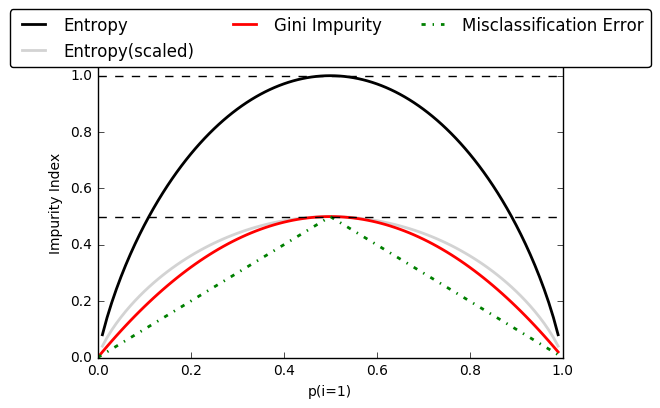

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# ジニ不純度の巻数を定義
def gini(p):
    return (p)*(1-(p)) + (1 - p)*(1 - (1 - p))

# エントロピーの巻数を定義
def entropy(p):
    return - p*np.log2(p) - (1-p)* np.log2((1-p))

# 分類誤差の関数を定義
def error(p):
    return 1 - np.max([p, 1 - p])

# 確率を表す配列を生成（0から0.99まで0.01刻み）
x = np.arange(0.0, 1.0, 0.01)

# 配列の値を元にエントロピー、分類誤差を計算
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

# 図の作成を開始
fig = plt.figure()
ax = plt.subplot(111)

# エントロピー（２種）、ジニ不純度、分類誤差のそれぞれをループ処理
for i , lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy(scaled)',
                          'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '-', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    
# 凡例の設定（中央の上に配置）
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
         ncol=3, fancybox=True, shadow=False)

# 2本の水平の破線を引く
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

# 横軸の上限/下限を設定
plt.ylim([0, 1.1])

plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [24]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    # 各特徴量を１次元配列に変換して予測を実行
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドんポイントのデータサイズに変換
    z = z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx), 
                   marker=markers[idx], label=cl)
    # テストサンプルを目立たせる（点を○で表示）
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidths=1, marker='o',
                   s=55, label='test set')

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)

# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

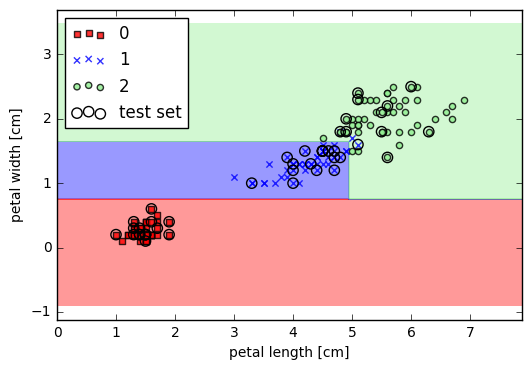

In [26]:
from sklearn.tree import DecisionTreeClassifier

# エントロピーを指標とする決定木のインスタンスを生成
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# 決定木のモデルにトレーニングデータを適合させる
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined, y=y_combined, classifier=tree, 
                      test_idx=range(105, 150))

# 軸のラベルの設定
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.show()

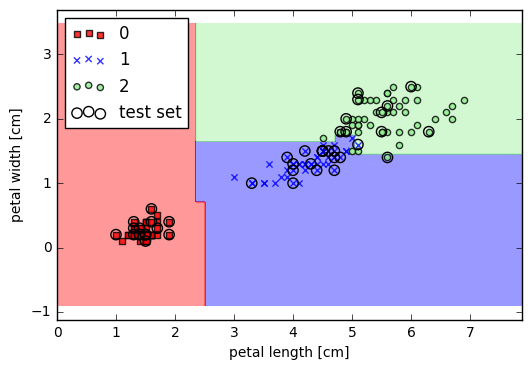

In [27]:
from sklearn.ensemble import RandomForestClassifier

# エントロピーを指標とするランダムフォレストのインスタンスを生成
forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=10, random_state=1, n_jobs=2)

# ランダムフォレストのモデルにトレーニングデータを適合させる
forest.fit(X_train, y_train)
plot_decision_regions(X=X_combined, y=y_combined, classifier=forest, 
                      test_idx=range(105, 150))

# 軸のラベルの設定
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.show()

In [28]:
# トレーニングデータとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))

# トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))

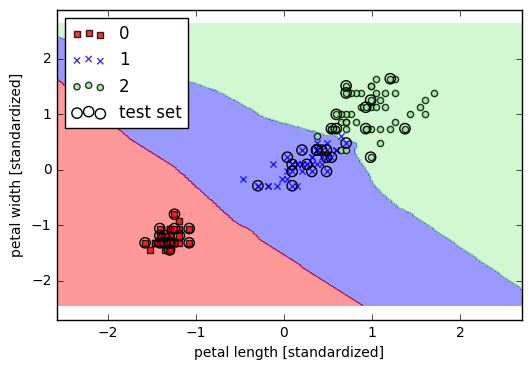

In [31]:
# k近傍法
from sklearn.neighbors import KNeighborsClassifier

# k近傍法のインスタンスを生成
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

# k近傍法のモデルにトレーニングデータを適合させる
plot_decision_regions(X_combined_std, y_combined, classifier=knn, 
                      test_idx=range(105, 150))

# 軸のラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.show()